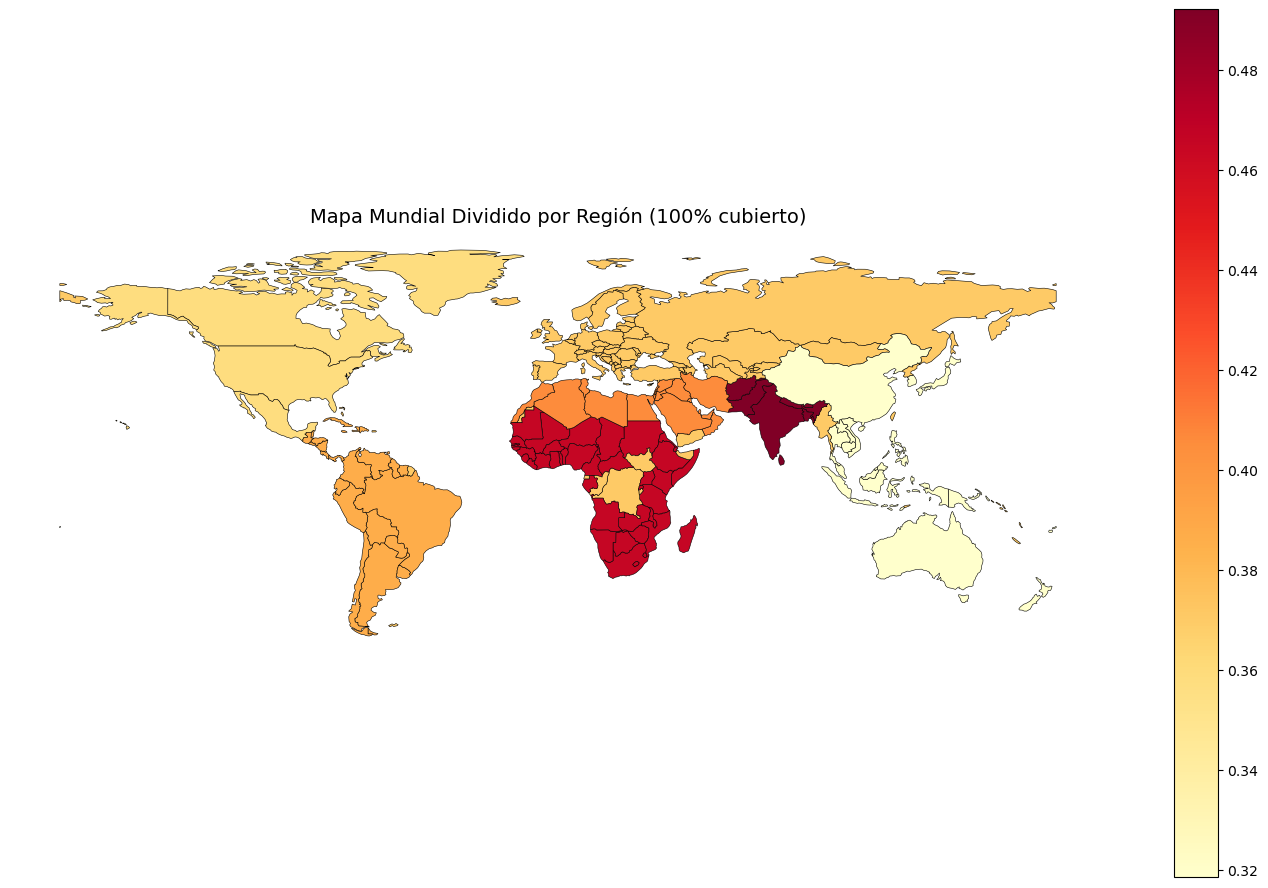

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Cargar shapefile ===
shapefile_path = 'ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# === 2. Regiones y valores ===
region_data = {
    "region": [
        "East Asia & Pacific",
        "North America",
        "Europe & Central Asia",
        "Latin America & Caribbean",
        "Middle East & North Africa",
        "Sub-Saharan Africa",
        "South Asia"
    ],
    "value": [0.31858667, 0.35756000, 0.37061951, 0.38649167, 0.40592857, 0.46535185, 0.49206667],
    "rank": [1, 2, 3, 4, 5, 6, 7]
}
regions_df = pd.DataFrame(region_data)

# === 3. Diccionario principal (completo sólo para países bien clasificados) ===
region_countries = {
    "East Asia & Pacific": [
        "China", "Japan", "South Korea", "Australia", "Indonesia", "Philippines",
        "Malaysia", "Thailand", "Vietnam", "Papua New Guinea", "New Zealand", "Fiji", "Brunei", "Cambodia", "Laos"
    ],
    "North America": [
        "United States of America", "Canada", "Mexico"
    ],
    "Europe & Central Asia": [
        "Germany", "France", "United Kingdom", "Russia", "Poland", "Ukraine", "Italy", "Spain", "Austria", "Belgium",
        "Czechia", "Portugal", "Netherlands", "Sweden", "Norway", "Romania", "Switzerland", "Kazakhstan", "Uzbekistan",
        "Turkmenistan", "Kyrgyzstan", "Tajikistan", "Georgia", "Armenia", "Azerbaijan", "Latvia", "Lithuania", "Estonia"
    ],
    "Latin America & Caribbean": [
        "Brazil", "Argentina", "Chile", "Colombia", "Peru", "Venezuela", "Ecuador", "Bolivia", "Uruguay", "Paraguay",
        "Cuba", "Dominican Rep.", "Guatemala", "Honduras", "El Salvador", "Nicaragua", "Costa Rica", "Panama", "Haiti",
        "Jamaica", "Trinidad and Tobago", "Belize", "Guyana", "Suriname"
    ],
    "Middle East & North Africa": [
        "Egypt", "Algeria", "Saudi Arabia", "Morocco", "Iran", "Iraq", "Israel", "Tunisia", "Jordan", "Syria",
        "Lebanon", "Libya", "United Arab Emirates", "Palestine", "Oman", "Qatar", "Kuwait", "Bahrain"
    ],
    "Sub-Saharan Africa": [
        "Nigeria", "South Africa", "Kenya", "Ethiopia", "Tanzania", "Ghana", "Angola", "Mozambique", "Zambia",
        "Zimbabwe", "Senegal", "Cameroon", "Rwanda", "Uganda", "Botswana", "Namibia", "Mali", "Malawi", "Burkina Faso",
        "Sierra Leone", "Liberia", "Côte d'Ivoire", "Madagascar", "Benin", "Chad", "Niger", "Sudan", "Togo", "Guinea",
        "Guinea-Bissau", "Central African Rep.", "Somalia", "Gambia", "Djibouti", "Eritrea", "Equatorial Guinea",
        "Gabon", "Lesotho", "eSwatini", "Mauritania"
    ],
    "South Asia": [
        "India", "Pakistan", "Bangladesh", "Nepal", "Sri Lanka", "Bhutan", "Afghanistan"
    ]
}

# === 4. Asignar región con fallback ===
def assign_region_fallback(country):
    for region, countries in region_countries.items():
        if country in countries:
            return region
    # Asignación por continente / heurística (simplificada)
    if country in ["Greenland", "United States of America", "Canada", "Mexico"]:
        return "North America"
    elif country in ["Australia", "New Zealand", "Papua New Guinea", "Fiji"]:
        return "East Asia & Pacific"
    elif country in ["Kazakhstan", "Uzbekistan", "Russia", "Ukraine", "Turkey", "Azerbaijan"]:
        return "Europe & Central Asia"
    elif country in ["Antarctica", "Fr. S. Antarctic Lands"]:
        return None
    elif country in world["NAME"].tolist():
        # Default: asignar a "Europe & Central Asia" si no está en lista (puedes cambiar esto)
        return "Europe & Central Asia"
    return None

world["region"] = world["NAME"].apply(assign_region_fallback)

# === 5. Unir valores por región ===
world = world.merge(regions_df, on="region", how="left")

# === 6. Visualizar ===
fig, ax = plt.subplots(figsize=(14, 9))
world.plot(column='value', ax=ax, cmap='YlOrRd', legend=True, edgecolor='black', linewidth=0.4)
plt.title("Mapa Mundial Dividido por Región (100% cubierto)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# === 7. Exportar ===
world.to_file("regional_map_full_coverage.geojson", driver="GeoJSON")


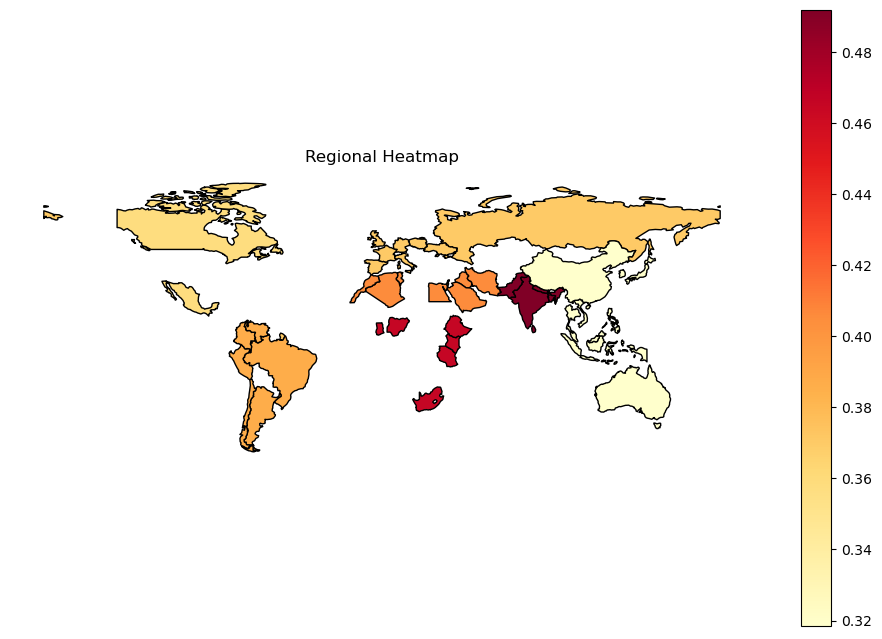

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
world_filtered.plot(column='value', ax=ax, legend=True, cmap='YlOrRd', edgecolor='black')
plt.title("Regional Heatmap")
plt.axis('off')
plt.show()

In [4]:
print(sorted(world["NAME"].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '